# Model Training [ Result 3 ] -- Part 1 
# Target variable --> Average score
## with Top 10 features
### 1.1 Import Data and Required Packages  
Importing Pandas, Numpy, Matplotlib, Seaborn

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error

### Preparing X and Y variables

In [101]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')

Y_train = pd.read_csv('Y_train.csv').squeeze()
Y_test = pd.read_csv('Y_test.csv').squeeze()

X=X_train
Y=Y_train

In [102]:
X.columns

Index(['math_score', 'test_preparation_course_completed',
       'test_preparation_course_none', 'lunch_free/reduced', 'gender_female',
       'lunch_standard', 'parental_level_of_education_high school',
       'race_ethnicity_group D', 'race_ethnicity_group B', 'gender_male'],
      dtype='object')

In [103]:
X_train

,math_score,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,gender_female,lunch_standard,parental_level_of_education_high school,race_ethnicity_group D,race_ethnicity_group B,gender_male
0,62,0,1,0,1,1,0,1,0,0
1,66,1,0,1,1,0,0,0,0,0
2,79,0,1,1,1,0,0,1,0,0
3,61,0,1,1,0,0,0,0,0,1
4,73,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
795,87,0,1,0,1,1,0,1,0,0
796,69,0,1,0,0,1,0,0,0,1
797,53,0,1,0,1,1,0,0,0,0
798,50,1,0,1,0,0,0,0,0,1


In [104]:
Y_test

0      87.0
1      64.0
2      75.0
3      75.0
4      82.0
       ... 
195    55.0
196    57.0
197    77.0
198    72.0
199    69.0
Name: average, Length: 200, dtype: float64

In [105]:
type(Y)

pandas.core.series.Series

## Linear Regression

In [106]:
#Linear Regression
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
l1.get_params()
l1.fit(X_train,Y_train)
print(l1.intercept_)
print(l1.coef_)

8.550415474877411
[ 0.90017735  1.26983718 -1.26983718  0.61098523  4.12429887 -0.61098523
 -0.6637314   0.91329457  0.04812661 -4.12429887]


In [107]:
coef_df=pd.DataFrame(l1.coef_,index=X.columns,columns=['Coefficient'])
print(coef_df)

                                         Coefficient
math_score                                  0.900177
test_preparation_course_completed           1.269837
test_preparation_course_none               -1.269837
lunch_free/reduced                          0.610985
gender_female                               4.124299
lunch_standard                             -0.610985
parental_level_of_education_high school    -0.663731
race_ethnicity_group D                      0.913295
race_ethnicity_group B                      0.048127
gender_male                                -4.124299


                                         Coefficient
gender_male                                -4.124299
test_preparation_course_none               -1.269837
parental_level_of_education_high school    -0.663731
lunch_standard                             -0.610985
race_ethnicity_group B                      0.048127
lunch_free/reduced                          0.610985
math_score                                  0.900177
race_ethnicity_group D                      0.913295
test_preparation_course_completed           1.269837
gender_female                               4.124299


<AxesSubplot:>

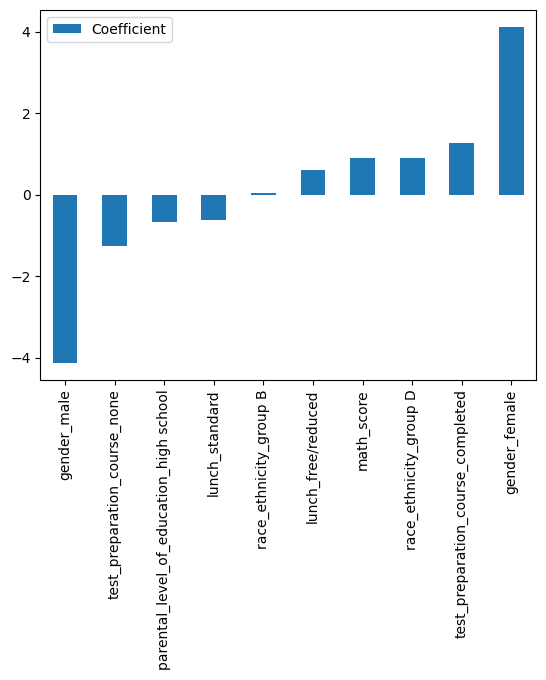

In [108]:
print(coef_df.sort_values(by='Coefficient'))
coef_df.sort_values(by='Coefficient').plot(kind='bar')

In [109]:
predictions=l1.predict(X_test) 
pred_df=pd.DataFrame(Y_test) ### Creating DataFrame of Y_test(Price)and predictions(price)
pred_df['Predictons']=predictions   
pred_df

,average,Predictons
0,87.0,92.710031
1,64.0,62.313063
2,75.0,75.472777
3,75.0,70.380389
4,82.0,80.699866
...,...,...
195,55.0,61.614322
196,57.0,60.895964
197,77.0,78.677113
198,72.0,69.305420


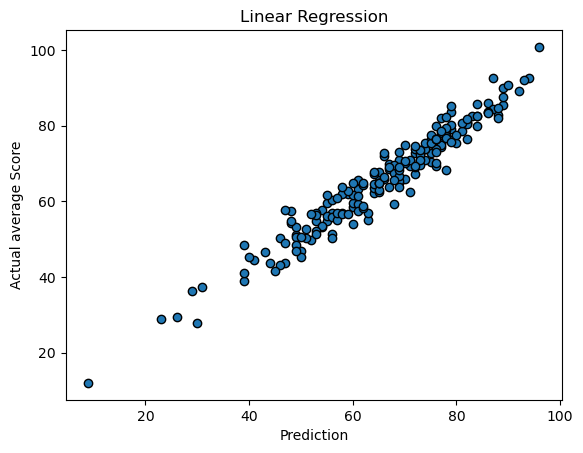

In [110]:
plt.scatter(Y_test,predictions,edgecolors='black')
plt.ylabel('Actual average Score')
plt.xlabel("Prediction")
plt.title("Linear Regression")
plt.show()

In [111]:
# sns.distplot(Y_test-predictions)
# plt.show()

In [112]:
from sklearn.metrics import r2_score
print(" Accuracy of the Linear Regression model is", r2_score(Y_test,predictions)*100)

print("\n Mean Squared Error:", mean_squared_error(Y_test,predictions))

print("\n Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test,predictions)))

 Accuracy of the Linear Regression model is 94.28243098771112

 Mean Squared Error: 12.279495751782298

 Root Mean Squared Error: 3.5042111454337763


1 Mean Squared Error (MSE):  
MSE measures the average squared difference between the predicted and actual values. A lower MSE indicates a better model fit.  

2 Root Mean Squared Error (RMSE):  
RMSE is the square root of the MSE, which gives a measure of the average magnitude of the error. A lower RMSE indicates a better model fit.  

3 R-squared (R2):  
R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better model fit.  

In [113]:
### Building Decision Tree Regressor

from sklearn import tree
tree_clf=tree.DecisionTreeRegressor(criterion='squared_error',random_state=42,max_depth=4)
tree_clf.fit(X_train,Y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

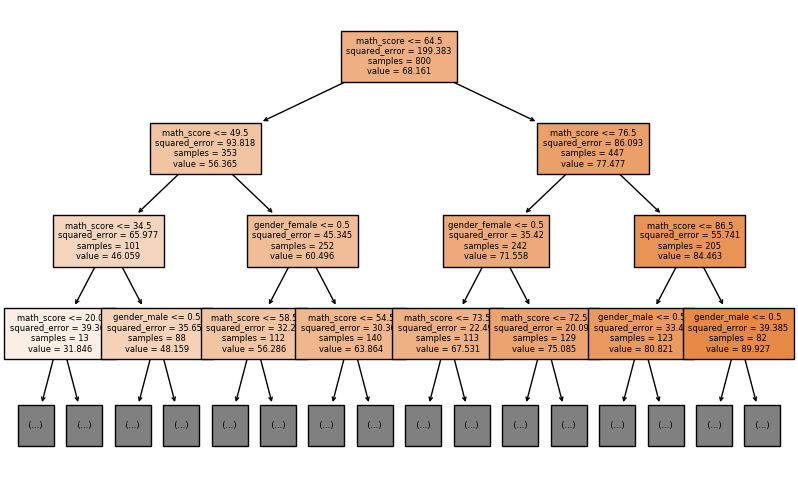

In [114]:
fig,ax=plt.subplots(figsize=(10,6))
tree.plot_tree(tree_clf,ax=ax,feature_names=X.columns,fontsize=6,filled=True,max_depth=3)
plt.show()

In [115]:
pdt=tree_clf.predict(X_test).round(0)
pdt

array([95., 59., 77., 72., 77., 77., 66., 59., 87., 52., 44., 34., 73.,
       51., 77., 73., 52., 52., 51., 66., 77., 51., 51., 51., 77., 77.,
       66., 51., 34., 51., 60., 66., 60., 72., 77., 51., 77., 73., 79.,
       22., 77., 66., 66., 59., 87., 66., 72., 34., 87., 79., 66., 66.,
       77., 51., 73., 73., 87., 52., 87., 85., 44., 73., 85., 66., 77.,
       73., 66., 60., 66., 85., 66., 85., 52., 51., 60., 77., 85., 52.,
       51., 52., 60., 44., 77., 66., 60., 66., 73., 66., 85., 34., 77.,
       95., 66., 66., 22., 72., 60., 66., 73., 66., 66., 66., 66., 66.,
       66., 66., 52., 72., 73., 51., 34., 73., 52., 51., 79., 60., 44.,
       52., 66., 77., 59., 66., 77., 66., 66., 66., 79., 73., 60., 66.,
       73., 77., 60., 95., 66., 34., 85., 77., 66., 51., 59., 66., 52.,
       44., 87., 51., 52., 72., 44., 79., 79., 66., 60., 66., 85., 73.,
       51., 66., 77., 59., 66., 72., 73., 52., 77., 66., 44., 87., 66.,
       79., 77., 72., 85., 73., 60., 34., 52., 73., 95., 73., 59

In [116]:
pred_df1=pd.DataFrame(Y_test) ### Creating DataFrame of Y_test(Price)and predictions(price)
pred_df1['Predictons']=pdt   
pred_df1

,average,Predictons
0,87.0,95.0
1,64.0,59.0
2,75.0,77.0
3,75.0,72.0
4,82.0,77.0
...,...,...
195,55.0,59.0
196,57.0,60.0
197,77.0,79.0
198,72.0,73.0


In [1]:
# plt.scatter(Y_test,pdt,edgecolors='black')
# plt.ylabel('Actual average Score')
# plt.xlabel("Prediction")
# plt.title("Decision Tree Regressor")
# plt.show()

In [118]:
print(" Accuracy of the Decision Tree Regressor model is ",r2_score(Y_test,pdt)*100 )

print("\n Mean Squared Error:", mean_squared_error(Y_test,pdt))

print("\n Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test,pdt)))

 Accuracy of the Decision Tree Regressor model is  89.59573893243528

 Mean Squared Error: 22.345

 Root Mean Squared Error: 4.727049819919396


C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


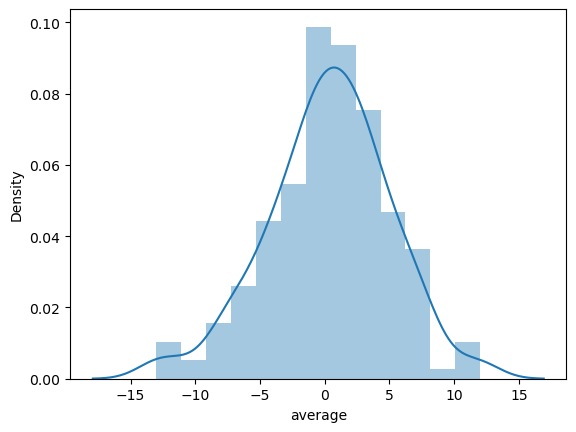

In [119]:
sns.distplot(Y_test-pdt)
plt.show()